# Fixed Normalization Factors

Something went *really* wrong with the fixed-normalization-factor run, but I have so far been unable to figure out what that is.

In [1]:
import os
import subprocess

import numpy as np
import matplotlib.pyplot as plt
from corner import corner
import seaborn as sns
import emcee
import dill as pickle

import model
import bayes

In [2]:
plt.style.use('science')
gr = (1 + np.sqrt(5)) / 2
h = 3

plt.rcParams['figure.dpi'] = 150

In [3]:
backend = emcee.backends.HDFBackend(
    'emulators/backends/emu_good_eps_1.0000e-02_ntrain_700_fat_0.3_cutoff_0.10_no_norm.h5'
)
backend.get_chain().shape

(1000, 32, 16)

In [4]:
with open('emulators/emu_good_eps_1.0000e-02_ntrain_700_fat_0.3_cutoff_0.10.pkl', 'rb') as f:
    emu = pickle.load(f)

In [5]:
emu._info['pct'].shape

(573, 92)

In [6]:
b3 = bayes.Model3(emu)
b4 = bayes.Model4(emu)

In [8]:
chain = backend.get_chain()
theta = chain[500, 0, :]

In [9]:
b4.ln_likelihood(theta)

1448.9629509305869

In [10]:
bayes.ln_prior(theta)

-204.33760366366357

In [11]:
with open('/spare/odell/7Be/CP/samples/model_1_2021-08-06-02-55-37.pkl', 'rb') as f:
    run = pickle.load(f)

cs_flat_chain = run.get_flat_chain()
f_cs = np.median(cs_flat_chain[:, 16:32], axis=0)
inv_f = 1/b4.normalization_factors(np.hstack((np.ones(16), f_cs)))
theta = run.get_theta_star()[:-1]

In [14]:
b4.ln_posterior(theta[:16])

1019.7097088292495

In [16]:
mu, cov = b4.gp_predict(theta[:16])

In [17]:
cov.shape

(573, 573)

In [18]:
lnps = [b4.ln_posterior(theta) for theta in backend.get_chain()[:, 0, :]]

In [19]:
lnps3 = [b3.ln_posterior(np.hstack((theta, 1/f_cs))) for theta in backend.get_chain()[:, 0, :]]

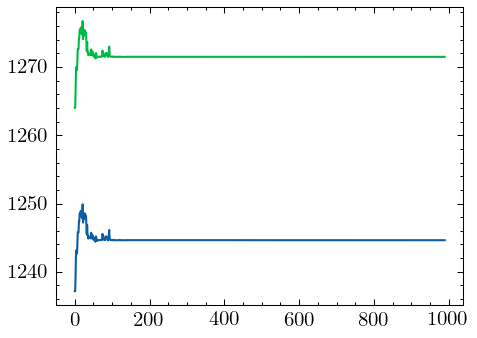

In [21]:
m =10

plt.plot(lnps[m:])
plt.plot(lnps3[m:]);
# plt.plot(lnps1);